In [16]:
from sympy import *
init_printing()

In [17]:
import pandas as pd

# Load cleaned weather data
file_path = "/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/dmi_weather_data_cleaned.csv"
df = pd.read_csv(file_path, header=0, parse_dates=["time"], index_col="time")

# Ensure `time` is datetime and remove any timezone info
df.index = pd.to_datetime(df.index).tz_localize(None)

# Load inflow data (KarupBro)
file_path_korup_parken = "/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Data/Bygholm_Kørup_Parken_VNF_døgn_1975-2023.csv"
korup_parken_df = pd.read_csv(file_path_korup_parken, decimal=",", encoding="ISO-8859-1", delimiter=";")

# Clean column names
korup_parken_df.columns = korup_parken_df.columns.str.strip()
korup_parken_df.columns = ["timestamp", "KarupBro", "BygholmPark"]

# Convert timestamp to datetime (ensure it's properly formatted)
korup_parken_df["timestamp"] = pd.to_datetime(korup_parken_df["timestamp"], format="%d-%m-%Y")

# Set timestamp as index to match `df`
korup_parken_df.set_index("timestamp", inplace=True)

# Drop unnecessary column
korup_parken_df.drop(columns=["BygholmPark"], inplace=True)

# Merge data on the index instead of the column
merged_df = df.join(korup_parken_df, how="left")

# Check result
merged_df.head()

,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,wind_dir_past1h,wind_speed_past1h,wind_gust_always_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob,KarupBro
time,,,,,,,,,,,,,,,,
2002-01-01,-9.3,6.4,1.250000,-0.062500,-0.2,0.1,0.037500,88.708333,281.666667,6.995833,10.587302,2.2,34.0,271.0,0.0,1829.75
2002-01-02,-6.3,6.4,-0.837500,-1.970833,-0.1,0.0,-0.033333,77.583333,110.208333,2.695833,10.685714,0.0,0.0,805.0,328.0,7279.46
2002-01-03,-7.6,-1.0,-5.166667,-6.937500,-0.2,0.0,-0.100000,87.458333,158.625000,1.195833,12.360317,0.0,0.0,739.0,278.5,5261.85
2002-01-04,-9.3,-1.3,-6.025000,-7.950000,-0.7,-0.2,-0.333333,80.916667,221.708333,0.987500,12.968254,0.0,0.0,876.0,355.0,2951.97
2002-01-05,-10.6,3.7,-3.466667,-4.337500,-1.1,-0.4,-0.754167,92.458333,239.750000,1.854167,10.766667,0.1,1.0,659.0,268.5,1868.53


In [18]:
import numpy as np

# Ensure datetime index is correctly formatted
merged_df.index = pd.to_datetime(merged_df.index)

# Extract "day of year" (1-365)
merged_df["day_of_year"] = merged_df.index.dayofyear

# Convert to cyclic features using sine and cosine
merged_df["day_sin"] = np.sin(2 * np.pi * merged_df["day_of_year"] / 365)
merged_df["day_cos"] = np.cos(2 * np.pi * merged_df["day_of_year"] / 365)

# Drop the raw day_of_year column (optional, since sine/cosine replace it)
merged_df.drop(columns=["day_of_year"], inplace=True)

# Check result
merged_df[["day_sin", "day_cos"]].head()

,day_sin,day_cos
time,,
2002-01-01,0.017213,0.999852
2002-01-02,0.034422,0.999407
2002-01-03,0.051620,0.998667
2002-01-04,0.068802,0.997630
2002-01-05,0.085965,0.996298


Train size: 4800, Val size: 1600, Test size: 1600
Epoch 1/50
600/600 [==============================] - 19s 29ms/step - loss: 0.5635 - val_loss: 0.4867
Epoch 2/50
600/600 [==============================] - 17s 28ms/step - loss: 0.4017 - val_loss: 0.4461
Epoch 3/50
600/600 [==============================] - 17s 28ms/step - loss: 0.3397 - val_loss: 0.4313
Epoch 4/50
600/600 [==============================] - 18s 30ms/step - loss: 0.2989 - val_loss: 0.4174
Epoch 5/50
600/600 [==============================] - 18s 31ms/step - loss: 0.2733 - val_loss: 0.3932
Epoch 6/50
600/600 [==============================] - 17s 29ms/step - loss: 0.2508 - val_loss: 0.3876
Epoch 7/50
600/600 [==============================] - 18s 30ms/step - loss: 0.2307 - val_loss: 0.4032
Epoch 8/50
600/600 [==============================] - 18s 31ms/step - loss: 0.2155 - val_loss: 0.3785
Epoch 9/50
600/600 [==============================] - 19s 31ms/step - loss: 0.1980 - val_loss: 0.3751
Epoch 10/50
600/600 [===========

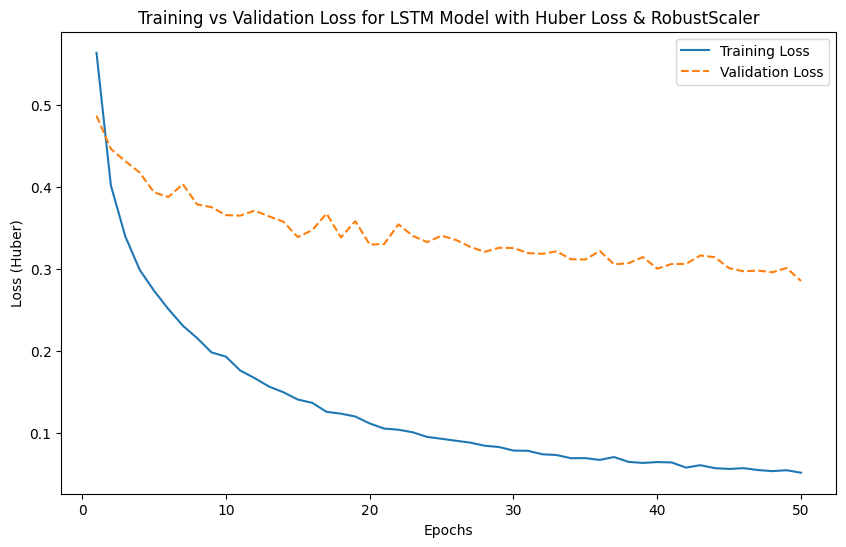

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import RobustScaler
import numpy as np
import tensorflow.keras.backend as K

# Define hyperparameters
TIME_STEPS = 30
BATCH_SIZE = 8
LEARNING_RATE = 0.0001
EPOCHS = 50  
DELTA = 2  # Huber loss threshold (adjustable)

# Define Huber Loss Function
def huber_loss(y_true, y_pred, delta=DELTA):
    error = y_true - y_pred
    is_small_error = K.abs(error) <= delta
    squared_loss = 0.5 * K.square(error)
    linear_loss = delta * (K.abs(error) - 0.5 * delta)
    return K.mean(tf.where(is_small_error, squared_loss, linear_loss))

# Preprocess Data
def preprocess_data(df, time_steps):
    scaler_X = RobustScaler()  # Change to RobustScaler
    scaler_y = RobustScaler()  # Also use for target variable

    # Ensure only numerical features
    X_scaled = scaler_X.fit_transform(df.drop(columns=["KarupBro"]).select_dtypes(include=[np.number]))
    y_scaled = scaler_y.fit_transform(df["KarupBro"].values.reshape(-1, 1))

    X_series, y_series = [], []
    for i in range(time_steps, len(X_scaled)):
        X_series.append(X_scaled[i - time_steps:i])
        y_series.append(y_scaled[i])

    return np.array(X_series), np.array(y_series), scaler_X, scaler_y

# Build LSTM Model with Huber Loss & L2 Regularization
def build_model(time_steps, features, learning_rate):
    model = Sequential([
        LSTM(200, return_sequences=True, input_shape=(time_steps, features), 
             kernel_regularizer=l2(0.001)),  
        Dropout(0.3),
        LSTM(100, return_sequences=False, kernel_regularizer=l2(0.001)),  
        Dropout(0.3),
        Dense(50, activation="relu", kernel_regularizer=l2(0.001)),  
        Dense(1)
    ])
    # Compile with Huber loss
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=huber_loss)
    return model

# Ensure dataset has no missing values
merged_df = merged_df.dropna()

# Prepare dataset
X_series, y_series, scaler_X, scaler_y = preprocess_data(merged_df, TIME_STEPS)

# Sequential Splitting for Time Series
train_size = int(0.6 * len(X_series))
val_size = int(0.2 * len(X_series))
test_size = len(X_series) - train_size - val_size

X_train, y_train = X_series[:train_size], y_series[:train_size]
X_val, y_val = X_series[train_size:train_size+val_size], y_series[train_size:train_size+val_size]
X_test, y_test = X_series[train_size+val_size:], y_series[train_size+val_size:]

print(f"Train size: {len(X_train)}, Val size: {len(X_val)}, Test size: {len(X_test)}")

# Build and train model
model = build_model(TIME_STEPS, X_series.shape[2], LEARNING_RATE)

# Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,       
    restore_best_weights=True 
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping], 
    verbose=1
)

# Extract loss values for logging
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot train vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss (Huber)")
plt.title("Training vs Validation Loss for LSTM Model with Huber Loss & RobustScaler")
plt.legend()
plt.show()

50/50 [==============================] - 1s 13ms/step


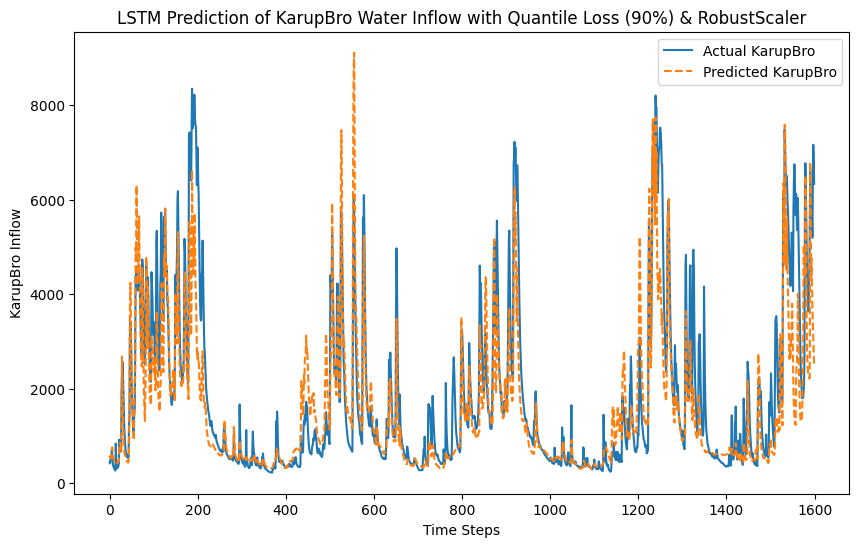

In [20]:
# Predict on test data
y_pred = model.predict(X_test)

# Ensure predictions are reshaped properly
y_pred = y_pred.reshape(-1, 1)

# Inverse transform using the same scaler
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label="Actual KarupBro")
plt.plot(y_pred_inverse, label="Predicted KarupBro", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("KarupBro Inflow")
plt.title("LSTM Prediction of KarupBro Water Inflow with Quantile Loss (90%) & RobustScaler")
plt.legend()
plt.show()


50/50 [==============================] - 1s 14ms/step
Extreme Values Evaluation (Top 10% of inflows):
MAE (Extreme): 1910.30
RMSE (Extreme): 2277.75
MPE (Extreme): 26.78%


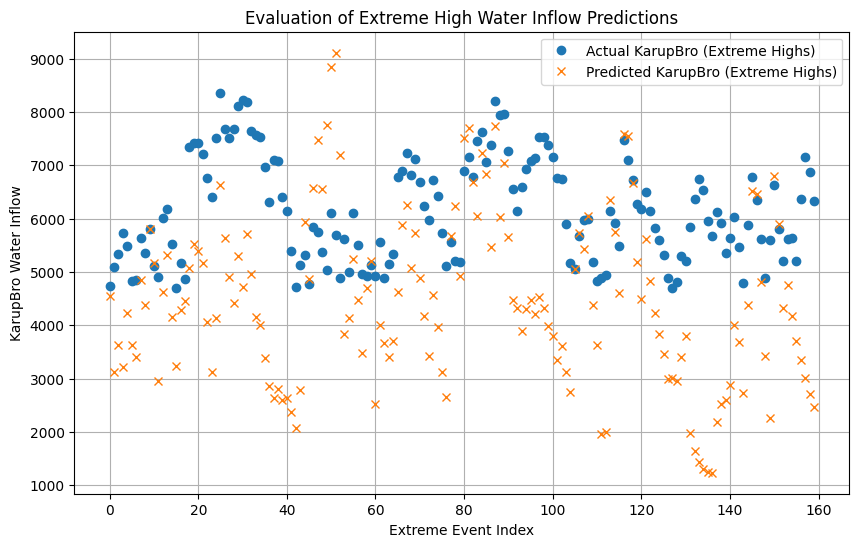

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test data
y_pred = model.predict(X_test).reshape(-1, 1)

# Inverse transform using RobustScaler
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Find the threshold for the top 10% extreme values
threshold = np.percentile(y_test_inverse, 90)  # Top 10% highest actual values

# Filter the extreme values
extreme_indices = np.where(y_test_inverse >= threshold)[0]
y_test_extreme = y_test_inverse[extreme_indices]
y_pred_extreme = y_pred_inverse[extreme_indices]

# Calculate error metrics for extreme values
mae_extreme = mean_absolute_error(y_test_extreme, y_pred_extreme)
rmse_extreme = np.sqrt(mean_squared_error(y_test_extreme, y_pred_extreme))
mpe_extreme = np.mean((y_test_extreme - y_pred_extreme) / y_test_extreme) * 100  # Mean Percentage Error

print(f"Extreme Values Evaluation (Top 10% of inflows):")
print(f"MAE (Extreme): {mae_extreme:.2f}")
print(f"RMSE (Extreme): {rmse_extreme:.2f}")
print(f"MPE (Extreme): {mpe_extreme:.2f}%")

# Plot actual vs predicted extreme values
plt.figure(figsize=(10, 6))
plt.plot(y_test_extreme, label="Actual KarupBro (Extreme Highs)", marker="o", linestyle="None")
plt.plot(y_pred_extreme, label="Predicted KarupBro (Extreme Highs)", marker="x", linestyle="None")
plt.xlabel("Extreme Event Index")
plt.ylabel("KarupBro Water Inflow")
plt.title("Evaluation of Extreme High Water Inflow Predictions")
plt.legend()
plt.grid()
plt.show()
